In [1]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K

In [3]:
from keras.models import Sequential

In [4]:
# laoding the data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
# normalization

X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [6]:
X_train_new = np.expand_dims(X_train_full, axis=3)
X_test_new = np.expand_dims(X_test, axis=3)

In [7]:
print(X_train_new.shape, X_test_new.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
# padding the images into size of  32 * 32

X_train_resized = keras.layers.ZeroPadding2D(padding=2)(X_train_new)
X_test_resized = keras.layers.ZeroPadding2D(padding=2)(X_test_new)

In [9]:
X_train_resized.shape, X_test_resized.shape

(TensorShape([60000, 32, 32, 1]), TensorShape([10000, 32, 32, 1]))

Text(0.5, 1.0, 'Padded')

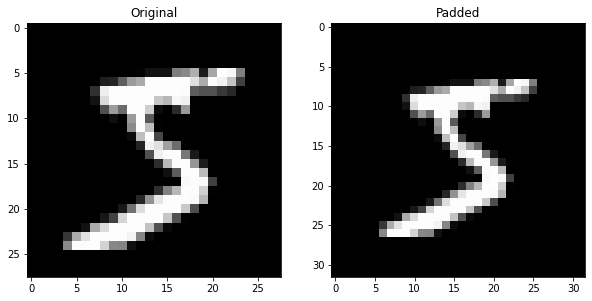

In [10]:
figure, axs = plt.subplots(1, 2, figsize=(10,8))
axs[0].imshow(X_train_new[0], cmap="gray")
axs[0].set_title("Original")

axs[1].imshow(X_train_resized[0], cmap="gray")
axs[1].set_title("Padded")

In [11]:
class RBFLayer(keras.layers.Layer):
    def __init__(self, units, gamma, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)
    
    def build(self, input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[input_shape[-1], self.units],
            initializer="uniform", trainable=True
        )
        
        super().build(input_shape)
    
    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.kernel
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units":self.units, 
                "gamma":self.gamma}

In [12]:
class LeNet5:
    """
    Hard coded implementation of the LeNet-5 architecture.
    The LeNet architecture contains 3 Convolutional Layers,
    2 Average Pooling Layers, 2 Fully Connected Dense Layers.
    """
    def build():
        model = keras.models.Sequential([
            keras.layers.Conv2D(filters=6, 
                            kernel_size=5, 
                            strides=(1, 1), 
                            activation="tanh",
                            input_shape=[32, 32, 1]),
            keras.layers.AveragePooling2D(strides=2),
        
            keras.layers.Conv2D(filters=16, 
                                kernel_size=5, 
                                strides=(1, 1), 
                                activation="tanh"),

            keras.layers.AveragePooling2D(strides=2),

            keras.layers.Conv2D(filters=120, 
                                kernel_size=5, 
                                strides=(1, 1), 
                                activation="tanh"),

            keras.layers.Flatten(),

            keras.layers.Dense(84, activation="tanh"),

            RBFLayer(10, 0.5)
        ])
        
#         conv1 = keras.layers.Conv2D(filters=6, 
#                                     kernel_size=5, 
#                                     strides=(1, 1), 
#                                     activation="tanh",
#                                     input_shape=[32, 32, 1])
        
#         avg_pool1 = keras.layers.AveragePooling2D(strides=2)(conv1)
        
#         conv2 = keras.layers.Conv2D(filters=16, 
#                                     kernel_size=5, 
#                                     strides=(1, 1), 
#                                     activation="tanh")(avg_pool1)
        
#         avg_pool2 = keras.layers.AveragePooling2D(strides=2)(conv2)
        
#         conv3 = keras.layers.Conv2D(filters=120, 
#                                     kernel_size=5, 
#                                     strides=(1, 1), 
#                                     activation="tanh")(avg_pool2)
        
#         flat_layer = keras.layers.Flatten()(conv3)
        
#         full_con1 = keras.layers.Dense(84, activation="tanh")(flat_layer)
        
#         output = RBFLayer(10, 0.5)(full_con1)
        
#         model = keras.Model(inputs=[conv1], outputs=[output])
        return model

In [13]:
K.clear_session()

In [14]:
model = LeNet5.build()

In [15]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [16]:
X_train, X_valid = X_train_resized[:50000], X_train_resized[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [17]:
history = model.fit(X_train, y_train, epochs=10, 
         validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 0.2820 - accuracy: 0.9237 - val_loss: 0.1055 - val_accuracy: 0.9696
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0908 - accuracy: 0.9724 - val_loss: 0.1051 - val_accuracy: 0.9708
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0652 - accuracy: 0.9805 - val_loss: 0.0714 - val_accuracy: 0.9791
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0533 - accuracy: 0.9842 - val_loss: 0.0678 - val_accuracy: 0.9800
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0452 - accuracy: 0.9867 - val_loss: 0.0630 - val_accuracy: 0.9818
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0377 - accuracy: 0.9894 - val_loss: 0.0620 - val_accuracy: 0.9849
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0337 - accuracy: 0.9904 - val_loss: 0.0594 - val_ac

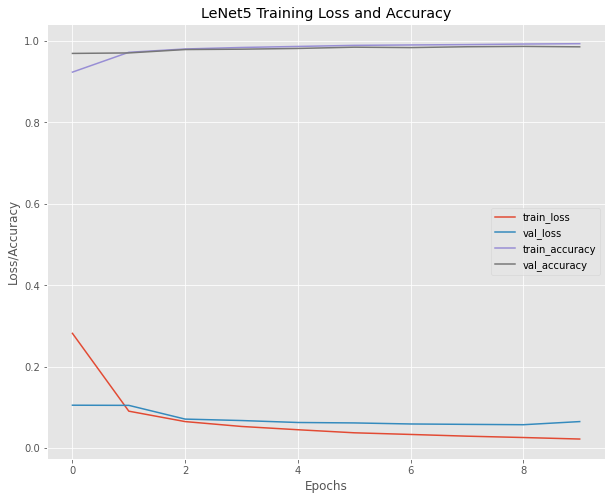

In [19]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))

plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_accuracy")

plt.title("LeNet5 Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [20]:
model.evaluate(X_test_resized, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0647 - accuracy: 0.9849


[0.06465494632720947, 0.9848999977111816]